<a href="https://colab.research.google.com/github/Nicolas-Noir/MdD-TUIA-2024/blob/main/TP2/tp_mineria_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Información.

Primer integrante: Noir Nicolás,  N-1273/4

Segundo integrante: González Ignacio,  G-5933/1

Materia: Minería de datos

Año: 2024



## Librerías

In [139]:
!pip install graphviz pydotplus

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, RobustScaler, LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, mean_squared_error, mean_absolute_error, classification_report
from graphviz import Source
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import pydotplus
from IPython.display import Image
from sklearn import metrics
import sklearn
from pandas.core.frame import DataFrame
from pandas.core.frame import Series
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.exceptions import ConvergenceWarning
from sklearn.exceptions import UndefinedMetricWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore")

## Funciones

In [141]:
def metricas(modelo1: sklearn.base.BaseEstimator, modelo2 : sklearn.base.BaseEstimator , x_test1 : DataFrame, x_test2 : DataFrame):
  """
    Calcula las métricas de accuracy, precision y recall para dos modelos de `scikit-learn`.

    Parameters
    ----------
    modelo1 : sklearn.base.BaseEstimator
        Primer modelo de `scikit-learn` con el método `predict`.
    modelo2 : sklearn.base.BaseEstimator
        Segundo modelo de `scikit-learn` con el método `predict`.
    x_test1 : pd.DataFrame
        Conjunto de datos de prueba para el primer modelo.
    x_test2 : pd.DataFrame
        Conjunto de datos de prueba para el segundo modelo.

    Returns
    -------
    pd.DataFrame
        DataFrame con las métricas de Accuracy, Precision y Recall para ambos modelos.
  """

  predictions_test = modelo1.predict(x_test1)
  predictions_test2 = modelo2.predict(x_test2)
  #--

  accuracy_test = accuracy_score(y_test_pokemon, predictions_test)
  accuracy_test2 = accuracy_score(y_test_pokemon2, predictions_test2)
  #--

  precision_test = precision_score(y_test_pokemon, predictions_test, average='weighted', zero_division=0)
  precision_test2 = precision_score(y_test_pokemon2, predictions_test2, average='weighted', zero_division=0)
  #--

  recall_test = recall_score(y_test_pokemon, predictions_test, average='weighted')
  recall_test2 = recall_score(y_test_pokemon2, predictions_test2, average='weighted')

  valores_resultados_pokemon = {'Accuracy': [accuracy_test,accuracy_test2], 'Precision': [precision_test,precision_test2], 'Recall': [recall_test,recall_test2]}
  df_resultados = pd.DataFrame(valores_resultados_pokemon, index=['Test 1', 'Test 2'])
  return df_resultados

In [142]:
def matrices(modelo1: sklearn.base.BaseEstimator , modelo2: sklearn.base.BaseEstimator , x_test1 : DataFrame, x_test2 : DataFrame, y_test1 : Series, y_test2 : Series):
    """
    Grafica las matrices de confusión para dos modelos de clasificación.

    Parameters
    ----------
    modelo1 : sklearn.base.BaseEstimator
        Primer modelo de `scikit-learn` con el método `predict`.
    modelo2 : sklearn.base.BaseEstimator
        Segundo modelo de `scikit-learn` con el método `predict`.
    x_test1 : pd.DataFrame
        Conjunto de datos de prueba para el primer modelo.
    x_test2 : pd.DataFrame
        Conjunto de datos de prueba para el segundo modelo.
    y_test1 : pd.Series
        Etiquetas reales correspondientes a `x_test1` para el primer modelo.
    y_test2 : pd.Series
        Etiquetas reales correspondientes a `x_test2` para el segundo modelo.

    Returns
    -------
    None
        La función no devuelve nada, pero muestra las matrices de confusión para ambos modelos en gráficos.
    """

    predictions_test = modelo1.predict(x_test1)
    predictions_test2 = modelo2.predict(x_test2)
    matriz_confusion = metrics.confusion_matrix(y_test1, predictions_test)
    matriz_confusion2 = metrics.confusion_matrix(y_test2, predictions_test2)
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    metrics.ConfusionMatrixDisplay(confusion_matrix=matriz_confusion).plot(ax=ax[0])
    ax[0].set_title('Matriz de Confusión - Test 1')

    metrics.ConfusionMatrixDisplay(confusion_matrix=matriz_confusion2).plot(ax=ax[1])
    ax[1].set_title('Matriz de Confusión - Test 2')

    plt.tight_layout()
    plt.show()

## 1 Descargar el conjunto de datos, 1000_Companies. para realizar el trabajo práctico. Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de datos, etc.) y elegir un método de estandarización.

In [143]:
df_comp = pd.read_csv('https://raw.githubusercontent.com/Nicolas-Noir/Archivos-TUIA-2024-2do-cuatrimestre/main/1000_Companies.csv')
df_pokemon = pd.read_csv('https://raw.github.com/Nicolas-Noir/Archivos-TUIA-2024-2do-cuatrimestre/main/PokemonDBCart.csv')

In [144]:
x_train, x_test, y_train, y_test = train_test_split(df_comp.drop('Profit', axis=1), df_comp['Profit'], test_size=0.2, random_state=7655377)
x_train2, x_test2, y_train2, y_test2 = train_test_split(df_comp.drop('Profit', axis=1), df_comp['Profit'], test_size=0.3, random_state=7655377)
x_train.shape, x_test.shape, y_train.shape, y_test.shape,x_train2.shape, x_test2.shape,y_train2.shape, y_test2.shape

((800, 4), (200, 4), (800,), (200,), (700, 4), (300, 4), (700,), (300,))

In [145]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 837 to 114
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       800 non-null    float64
 1   Administration  800 non-null    float64
 2   MarketingSpend  800 non-null    float64
 3   State           800 non-null    object 
dtypes: float64(3), object(1)
memory usage: 31.2+ KB


El dataset no presenta valores faltantes, entonces no es necesario el proceso de imputación de valores faltantes.

In [146]:
x_train.describe()

RyD_Spend  Administration  MarketingSpend
count    800.000         800.000         800.000
mean   81074.803      122822.196      224450.500
std    46523.081       12768.035       91564.037
min        0.000       51283.140           0.000
25%    41966.500      116525.749      148905.499
50%    79401.000      122292.536      223015.769
75%   123376.660      129014.140      306052.884
max   162597.700      321652.140      443898.530

El dataset presenta variables con escalas diferentes, esto nos lleva a tener que escalar las variables para no tener posibles problemas en la creación del árbol de decisiones.

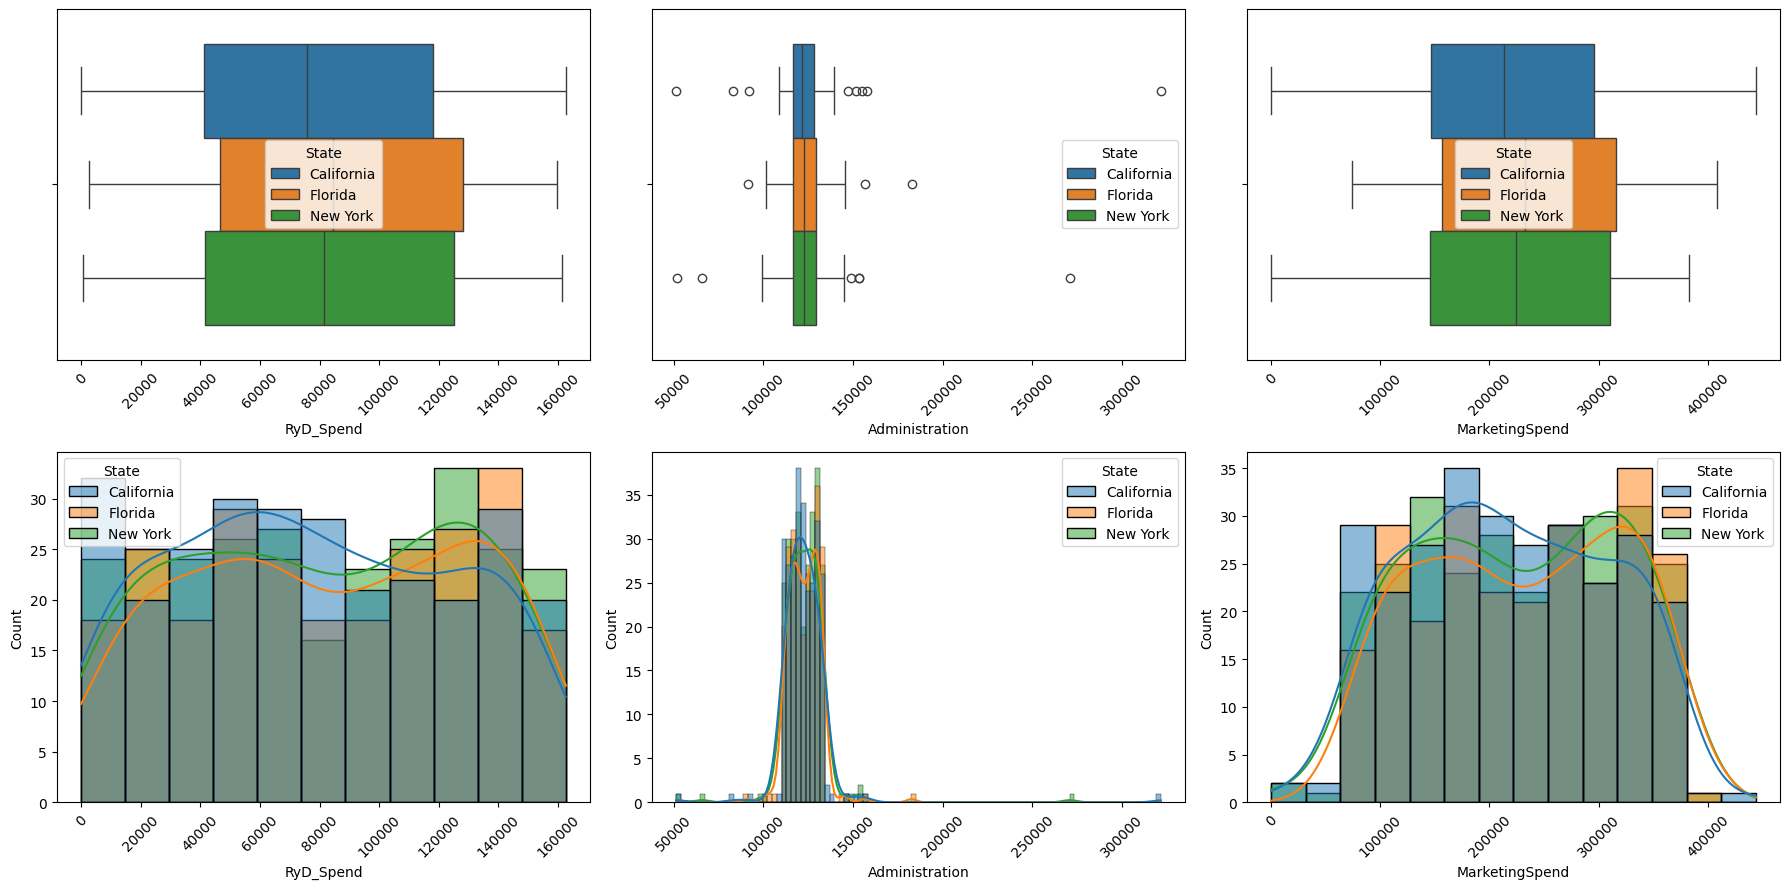

In [147]:
fig, axes = plt.subplots(2, 3, figsize=(18, 9))

for i, name in enumerate(x_train[['RyD_Spend','Administration','MarketingSpend']]):

    sns.boxplot(x=name, data=x_train, orient='h', ax=axes[0, i], hue='State')
    axes[0, i].tick_params(axis='x', rotation=45)

    sns.histplot(x=name, data=x_train, ax=axes[1, i], kde=True, hue='State')
    axes[1, i].tick_params(axis='x', rotation=45)


fig.tight_layout()
plt.show()

RyD_Spend presenta una distribución uniforme, Administration presenta una distribución normal con algunos outliers y MarketingSpend presenta una distribución bimodal. Viendo que una de las variables presenta outliers decidimos que escalaremos los datos con RobustScaler.

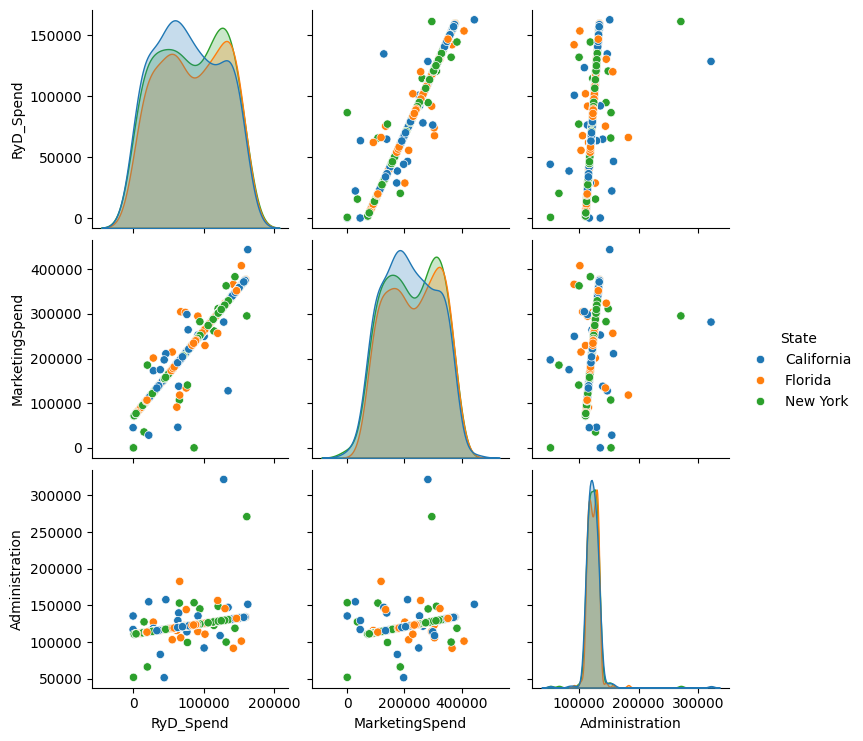

In [148]:
sns.pairplot(x_train, hue='State',x_vars=['RyD_Spend','MarketingSpend','Administration'],y_vars=['RyD_Spend','MarketingSpend','Administration'])
plt.show()

Todas las relaciones entre las variables parecen ser de tipo lineal, aún
teniendo un pequeño ruido que reduce el coeficiente de esta correlación. Decidimos que es necesario ver el coeficiente de las relaciones lineales entre las variables para poder tomar alguna decisión. Este análisis es realizado por la posibilidad de descartar alguna variable que sea redundante, es decir, una variable creada a partir de otra.

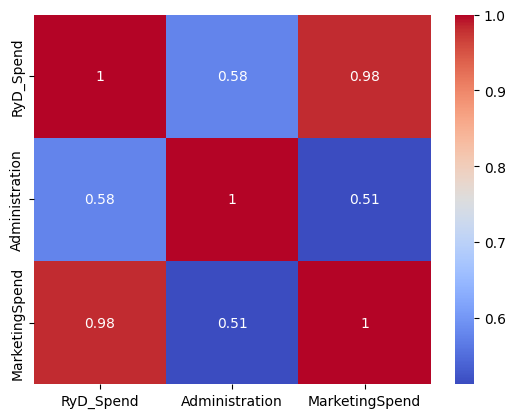

In [149]:
matriz = x_train[['RyD_Spend','Administration','MarketingSpend']].corr()
sns.heatmap(matriz, annot=True, cmap='coolwarm')
plt.show()

Aquí vemos con más detalle los valores del coeficiente de correlación de pearson, viendo que RyD_Spend con MarketingSpend tiene una correlación lineal muy fuerte de 0.98, Administración y RyD_Spend tienen una correlación lineal media de 0.58 y MarketingSpend y Administración tienen una correlación lineal media de 0.52. Aun así, no es posible descartar una variable por estar linealmente relacionada con otra.

In [150]:
label_enc = LabelEncoder()
x_train['State_codif'] = label_enc.fit_transform(x_train['State'])
x_test['State_codif'] = label_enc.transform(x_test['State'])
x_train2['State_codif'] = label_enc.transform(x_train2['State'])
x_test2['State_codif'] = label_enc.transform(x_test2['State'])

In [151]:
x_train.drop('State',axis=1,inplace=True)
x_test.drop('State',axis=1,inplace=True)
x_train2.drop('State',axis=1,inplace=True)
x_test2.drop('State',axis=1,inplace=True)

In [152]:
state_train = x_train['State_codif']
state_test = x_test['State_codif']
state_train2 = x_train2['State_codif']
state_test2 = x_test2['State_codif']

In [153]:
x_train.drop('State_codif',axis=1,inplace=True)
x_test.drop('State_codif',axis=1,inplace=True)
x_train2.drop('State_codif',axis=1,inplace=True)
x_test2.drop('State_codif',axis=1,inplace=True)

In [154]:
robust_scaler = RobustScaler(with_centering=False).set_output(transform='pandas')
x_train_esc = robust_scaler.fit_transform(x_train)
x_test_esc = robust_scaler.transform(x_test)
x_train_esc2 = robust_scaler.transform(x_train2)
x_test_esc2 = robust_scaler.transform(x_test2)

In [155]:
x_train_esc.describe()

RyD_Spend  Administration  MarketingSpend
count    800.000         800.000         800.000
mean       0.996           9.835           1.428
std        0.571           1.022           0.583
min        0.000           4.106           0.000
25%        0.515           9.331           0.948
50%        0.975           9.792           1.419
75%        1.515          10.331           1.948
max        1.997          25.756           2.825

Podemos observar que según la documentación de sklearn de RobustScaler cuando la distribución de la variable es normal al escalar el dataset esta va a presentar una desviación estándar de 1 y en caso de tener valores diferentes de uno, esto nos dice que su distribución no es normal, como observamos anteriormente en los histogramas.

In [156]:
x_train_esc['State_codif'] = state_train
x_test_esc['State_codif'] = state_test
x_train_esc2['State_codif'] = state_train2
x_test_esc2['State_codif'] = state_test2

------
--------
--------

## 2 Realizar la estimación del atributo Profit utilizando árboles de decisión (Regresión)

In [157]:
decision_tree_regresion_raw = tree.DecisionTreeRegressor(max_depth=1, min_samples_leaf=1, min_samples_split=2, random_state=629426)

decision_tree_regresion_raw.fit(x_train_esc, y_train)

DecisionTreeRegressor(max_depth=1, random_state=629426)

In [158]:
decision_tree_regresion2_raw = tree.DecisionTreeRegressor(max_depth=1, min_samples_leaf=1, min_samples_split=2, random_state=629426)

decision_tree_regresion2_raw.fit(x_train_esc2, y_train2)

DecisionTreeRegressor(max_depth=1, random_state=629426)

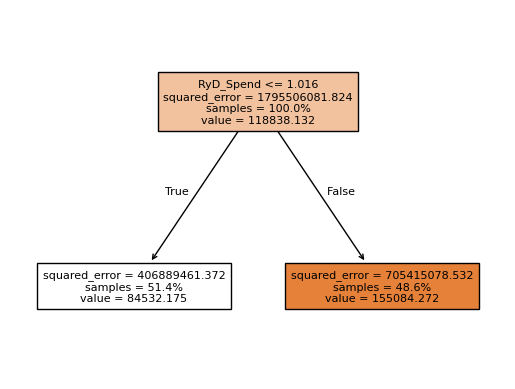

In [159]:
features = list(x_train_esc.columns)
tree.plot_tree(decision_tree_regresion_raw, feature_names=features, fontsize=8, filled=True, rounded=False, proportion=True)
plt.show()

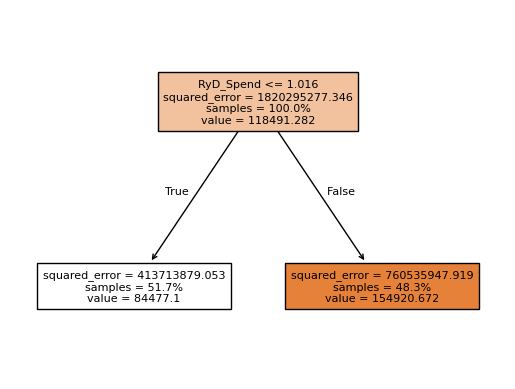

In [160]:
features = list(x_train_esc2.columns)
tree.plot_tree(decision_tree_regresion2_raw, feature_names=features, fontsize=8, filled=True, rounded=False, proportion=True)
plt.show()

In [161]:
pd.options.display.float_format = '{:.1f}'.format

In [162]:
prediccion_test_1 = decision_tree_regresion_raw.predict(x_test_esc)
prediccion_test_2 = decision_tree_regresion2_raw.predict(x_test_esc2)

mae_test_1 = mean_absolute_error(y_test, prediccion_test_1)
mae_test_2 = mean_absolute_error(y_test2, prediccion_test_2)

mse_test_1 = mean_squared_error(y_test, prediccion_test_1)
mse_test_2 = mean_squared_error(y_test2, prediccion_test_2)

rmse_test_1 = np.sqrt(mse_test_1)
rmse_test_2 = np.sqrt(mse_test_2)

valores_conj_res = {'Test 1':[mae_test_1,mse_test_1,rmse_test_1], 'Test 2':[mae_test_2,mse_test_2,rmse_test_2]}
df_conj_res = pd.DataFrame(valores_conj_res, index=['MAE', 'MSE', 'RMSE'])
df_conj_res

Test 1      Test 2
MAE      17806.0     17293.1
MSE  709768875.2 589693844.8
RMSE     26641.5     24283.6

Primero, se plantea un modelo muy sencillo del árbol de regresión, para poder observar de manera más rápida y sencilla la importancia de una sola característica en la predicción. Aunque en este modelo tan sencillo nos es muy complicado poder observar buenos valores de los errores de testeo, ya que estos tienen un gran sesgo por tener únicamente 1 de profundidad, y por eso demuestra tener valores bajos en las diferentes métricas.
Para ambos modelos, que utilizan el conjunto de entrenamiento 70/30, 80/20, se logra determinar que es muy necesaria una optimización de los parámetros del árbol, para poder encontrar mejores métricas. Otro punto a tener en cuenta es que entre ambos conjuntos de datos, no se llegan a apreciar grandes diferencias en cuanto a los resultados dados, ambos tomando el mismo valor de RyD spend para hacer la primera división

In [163]:
decision_tree_profit_reg = DecisionTreeRegressor(random_state=5232)

param_grid = {
    'max_depth': [6,7,8,9],
    'min_samples_leaf': [1,2],
    'min_samples_split': [5,6,7],
    'min_weight_fraction_leaf': [0.0, 0.1],
    'criterion': ['squared_error', 'absolute_error']
}

grid_search = GridSearchCV(estimator=decision_tree_profit_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=4, n_jobs=-1)

grid_search.fit(x_train_esc, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'criterion': 'squared_error', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0}


In [164]:
decision_tree_regresion = tree.DecisionTreeRegressor(max_depth=7, min_samples_leaf=1, min_samples_split=6, min_weight_fraction_leaf =0.0, criterion='squared_error', random_state=629426)

decision_tree_regresion.fit(x_train_esc, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_split=6, random_state=629426)

In [165]:
decision_tree_regresion2 = tree.DecisionTreeRegressor(max_depth=7, min_samples_leaf=1, min_samples_split=6, min_weight_fraction_leaf =0.0, criterion='squared_error', random_state=629426)

decision_tree_regresion2.fit(x_train_esc2, y_train2)

DecisionTreeRegressor(max_depth=7, min_samples_split=6, random_state=629426)

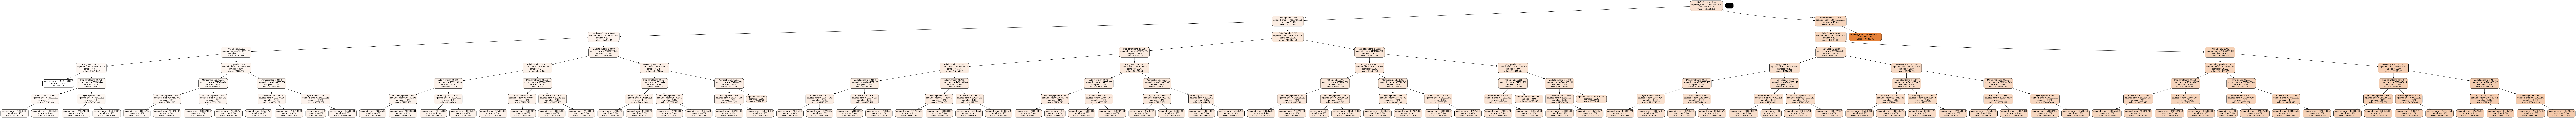

In [166]:
features = list(x_train_esc.columns)

dot_data = export_graphviz(
    decision_tree_regresion,
    out_file=None,
    feature_names=features,
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Se puede observar que al utilizar los diferentes hiperparámetros que fueron dados por gridsearchcv, mostrando que al darle una gran profundidad, se puede llegar a determinar de manera bastante precisa, las features más importantes, como RyD_Spend, al igual que en los árboles más sencillos, esta sigue siendo la más importante. También se puede observar que si seguimos los valores de profit en las hojas de izquierda a derecha, parece ser algo lineal que estaríamos partiendo en demasiadas partes, casi como una integral de una función lineal. Dándonos a entender que una función lineal puede ser estimada con un árbol de decisión y tiene la ventaja de que, en caso de que sea una función no lineal, esta obtiene mejores métricas que una regresión lineal.

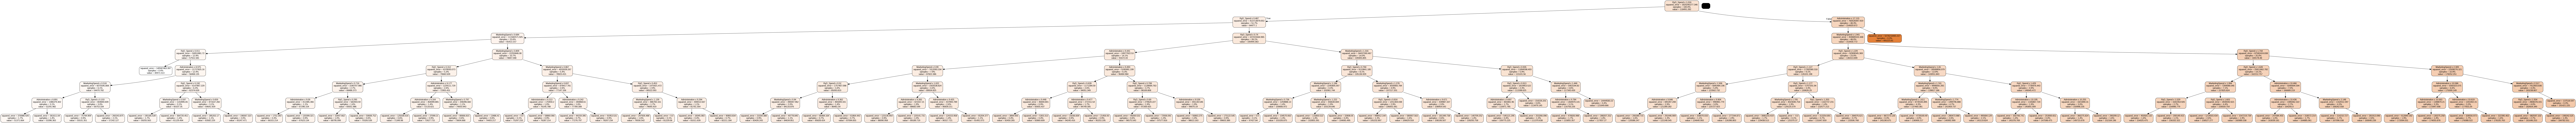

In [167]:
dot_data = export_graphviz(
    decision_tree_regresion2,
    out_file=None,
    feature_names=features,
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

No se observan diferencias entre ambos conjuntos de testeo. Siendo el análisis de este gráfico semejante al análisis anterior, ahorrandonos la redundancia.

In [168]:
prediccion_test_1 = decision_tree_regresion.predict(x_test_esc)
prediccion_test_2 = decision_tree_regresion2.predict(x_test_esc2)

mae_test_1 = mean_absolute_error(y_test, prediccion_test_1)
mae_test_2 = mean_absolute_error(y_test2, prediccion_test_2)

mse_test_1 = mean_squared_error(y_test, prediccion_test_1)
mse_test_2 = mean_squared_error(y_test2, prediccion_test_2)

rmse_test_1 = np.sqrt(mse_test_1)
rmse_test_2 = np.sqrt(mse_test_2)

valores_conj_res = {'Test 1':[mae_test_1,mse_test_1,rmse_test_1], 'Test 2':[mae_test_2,mse_test_2,rmse_test_2]}
df_conj_res = pd.DataFrame(valores_conj_res, index=['MAE', 'MSE', 'RMSE'])
df_conj_res

Test 1    Test 2
MAE      960.2     996.8
MSE  8108067.3 7577395.0
RMSE    2847.5    2752.7

Observamos que la métricas del segundo conjunto de prueba son ligeramente mejores, siendo el único cambio entre los modelos la cantidad de datos de entrenamiento y prueba.

In [169]:
pd.options.display.float_format = '{:.3f}'.format

---------
--------
----------

## 3- Descargar el conjunto de datos, PokemonDBCart. para realizar el trabajo práctico. Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de datos, etc.). Generar dos conjuntos de datos considerando 80-20 y 70-30 para entrenar y evaluar los modelos.

In [170]:
df_pokemon_sin_nombre = df_pokemon.drop(['Nombre'], axis=1)

df_pokemon_x = df_pokemon_sin_nombre.drop(['TipoPokemon'],axis=1)
df_pokemon_y = df_pokemon_sin_nombre['TipoPokemon']

x_train_pokemon, x_test_pokemon, y_train_pokemon, y_test_pokemon = train_test_split(df_pokemon_x,df_pokemon_y, test_size=0.2, random_state=3425)
x_train_pokemon2, x_test_pokemon2, y_train_pokemon2, y_test_pokemon2 = train_test_split(df_pokemon_x, df_pokemon_y, test_size=0.3, random_state=9678)
x_train_pokemon.shape, y_train_pokemon.shape, x_test_pokemon.shape, y_test_pokemon.shape, x_train_pokemon2.shape, y_train_pokemon2.shape, x_test_pokemon2.shape, y_test_pokemon2.shape

((383, 6), (383,), (96, 6), (96,), (335, 6), (335,), (144, 6), (144,))

Descartamos el nombre del pokemon, ya que no va a ser utilizado como variable.

In [171]:
x_train_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, 345 to 297
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Ataque     383 non-null    int64
 1   Defensa    383 non-null    int64
 2   Velocidad  383 non-null    int64
 3   HP         383 non-null    int64
 4   SpAtaque   383 non-null    int64
 5   SpDefensa  383 non-null    int64
dtypes: int64(6)
memory usage: 20.9 KB


No hay valores faltantes, por lo tanto, no es necesario imputar a los mismos.

In [172]:
x_train_pokemon.describe()

Ataque  Defensa  Velocidad      HP  SpAtaque  SpDefensa
count 383.000  383.000    383.000 383.000   383.000    383.000
mean   73.253   70.379     65.896  67.120    72.204     71.164
std    30.846   29.622     29.355  25.742    31.371     28.460
min    10.000   10.000      5.000   1.000    10.000     20.000
25%    50.000   50.000     45.000  50.000    50.000     50.000
50%    69.000   65.000     65.000  65.000    65.000     66.000
75%    90.000   85.000     85.000  78.000    91.500     89.500
max   181.000  230.000    160.000 255.000   194.000    230.000

Se observan que la escala de los datos es parecida, pero no es igual. Siendo necesario escalar los datos, esto gracias a que utilizaremos un modelo basado en distancias.

In [173]:
dataset_train_compl = x_train_pokemon.copy()
dataset_train_compl['TipoPokemon'] = y_train_pokemon


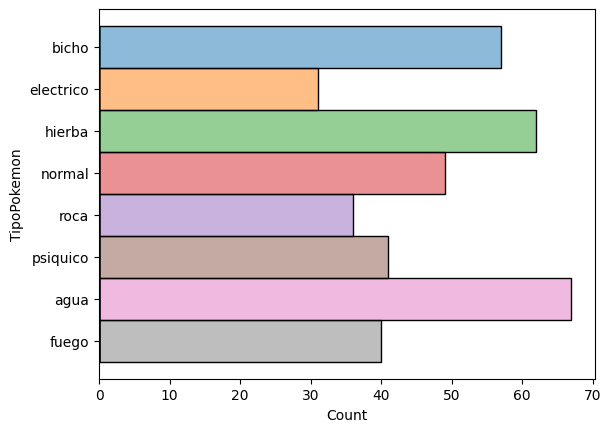

In [174]:
sns.histplot(data=dataset_train_compl, y='TipoPokemon', hue='TipoPokemon')
plt.legend([],frameon=False)
plt.show()

Se observa que el dataset está desbalanceado. Para obtener buenos modelos de clasificación va a ser necesario balancear el dataset.

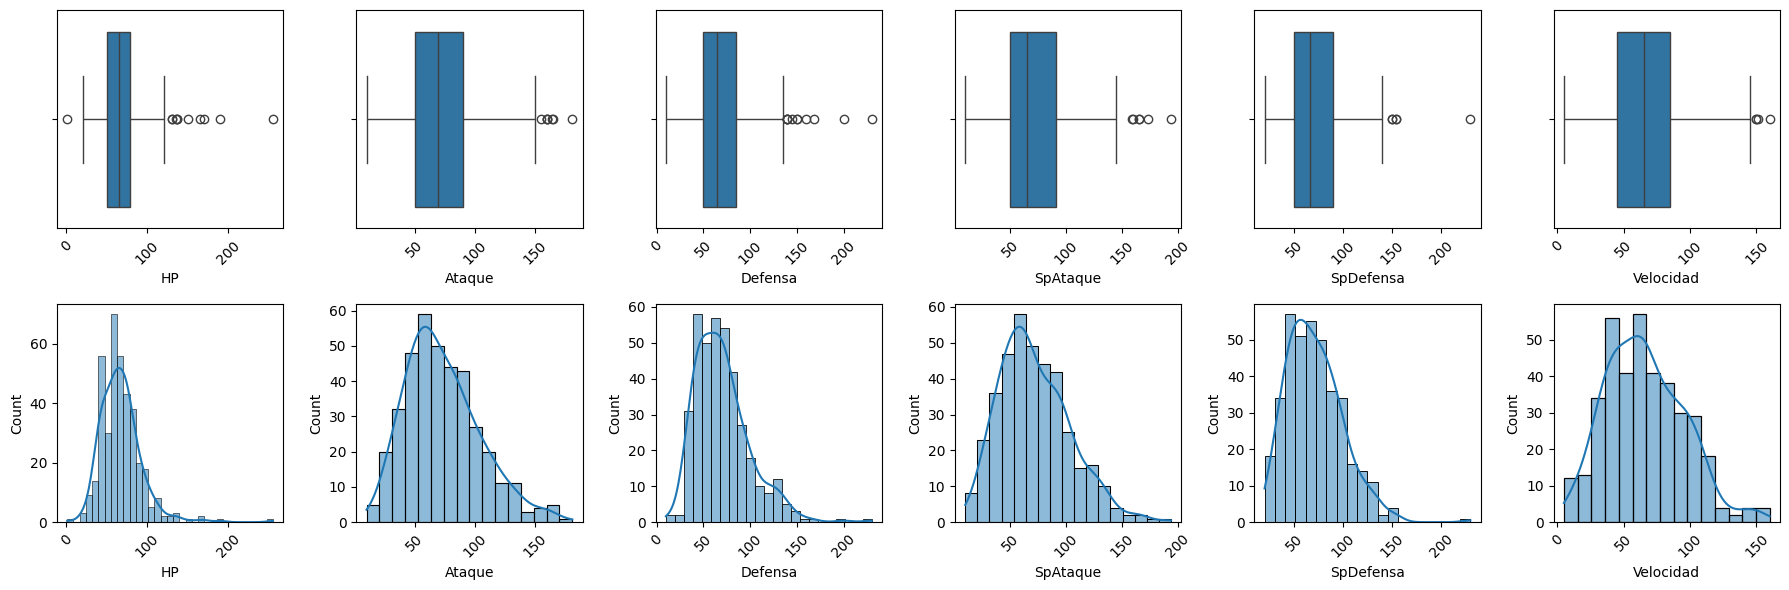

In [175]:
fig, axes = plt.subplots(2, 6, figsize=(18, 6))

for i, name in enumerate(x_train_pokemon[['HP','Ataque','Defensa','SpAtaque','SpDefensa' ,'Velocidad']]):

    sns.boxplot(x=name, data=x_train_pokemon, orient='h', ax=axes[0, i])
    axes[0, i].tick_params(axis='x', rotation=45)

    sns.histplot(x=name, data=x_train_pokemon, ax=axes[1, i], kde=True)
    axes[1, i].tick_params(axis='x', rotation=45)


fig.tight_layout()
plt.show()

Se observan algunas distribuciones normales y otras chi cuadrado generalizando sobre todos los tipos de pokemon. Desde nuestro punto de vista, es necesario dividir las distribuciones por clase, para tener una mejor visualización de las distribuciones de las variables y así poder tomar mejores decisiones sobre qué escalador utilizar.

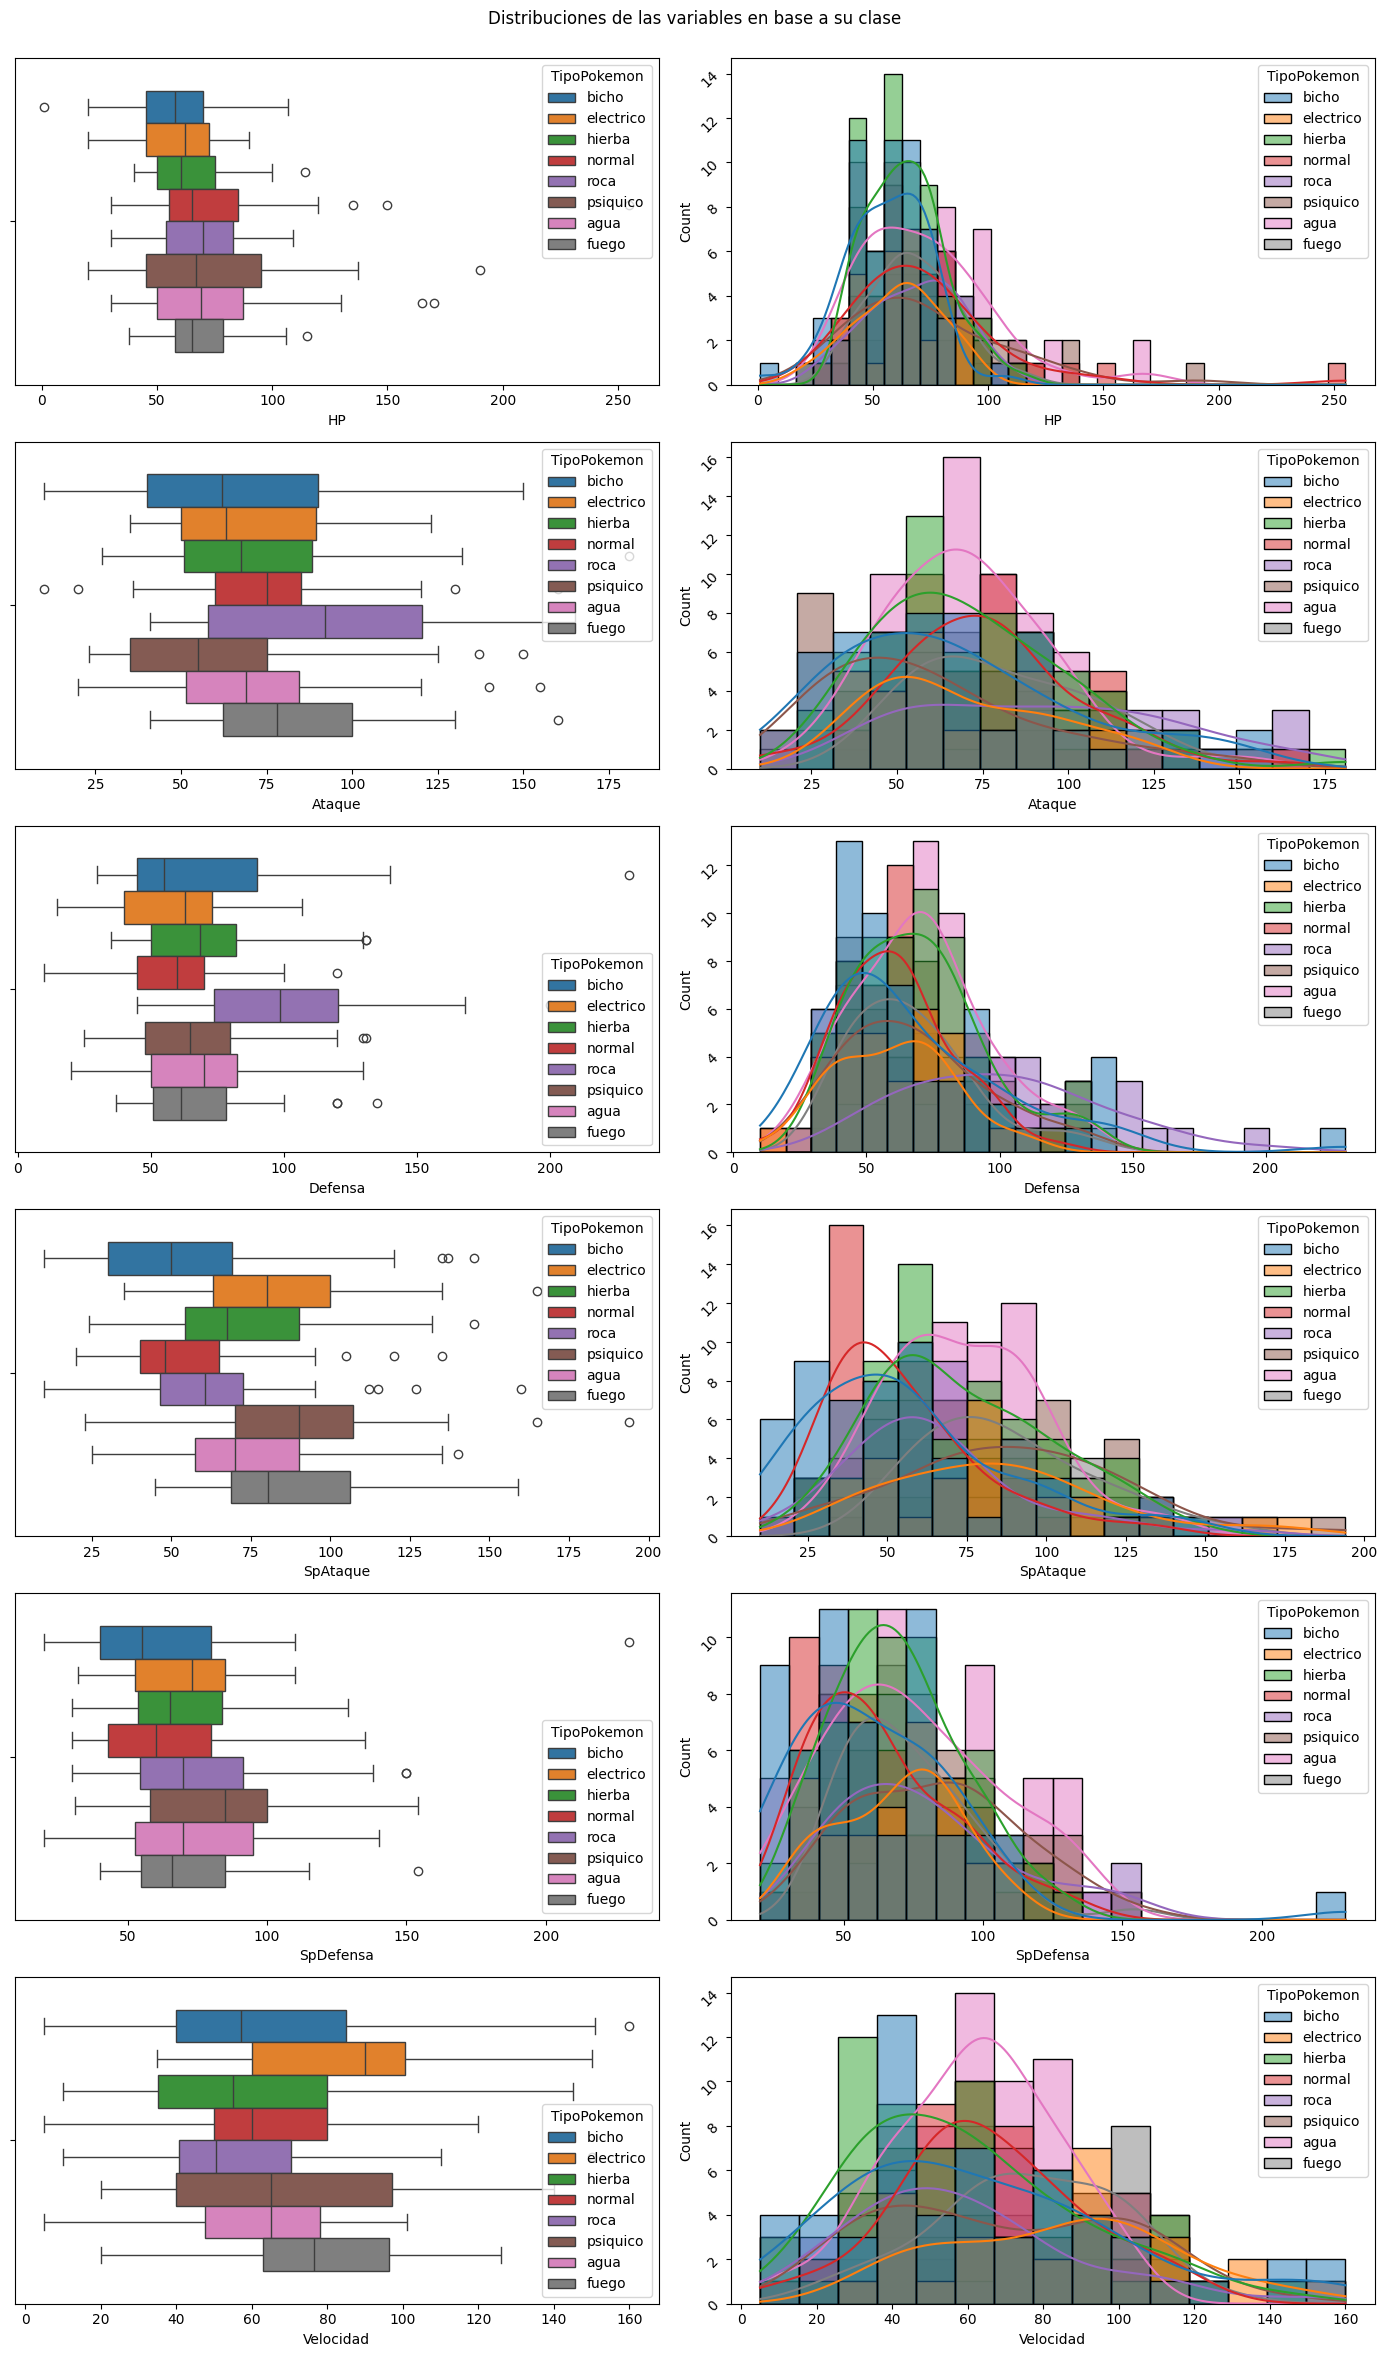

In [176]:
fig, axes = plt.subplots(6, 2, figsize=(14, 24))
fig.suptitle('Distribuciones de las variables en base a su clase')

for i, name in enumerate(dataset_train_compl[['HP','Ataque','Defensa','SpAtaque','SpDefensa' ,'Velocidad']]):

    sns.boxplot(x=name, data=dataset_train_compl, orient='h', ax=axes[i, 0], hue='TipoPokemon')
    axes[i, 0].tick_params(axis='y', rotation=45)

    sns.histplot(x=name, data=dataset_train_compl, ax=axes[i, 1], kde=True, hue='TipoPokemon')
    axes[i, 1].tick_params(axis='y', rotation=45)

fig.tight_layout()
fig.subplots_adjust(top=0.96)
plt.show()

Como se observó en el gráfico anterior, las distribuciones difieren de la distribución general de las variables dependiendo la clase.
Observando que la mayoría de las distribuciones no son normales ni chi cuadrado, por lo que capaz se podría utilizar un escalador normal o minmax. También existen outliers en algunas variables, dando pie al escalador robusto, pero aun así, son pocos como para tener que tratarlos o utilizar el escalador robusto. Basándonos en toda esta información, se decidió utilizar un escalador MinMax, para dejar la escala de 0 a 1.

También se puede observar en los histogramas cómo algunas variables tienen menos datos que las otras por el largo de las barras de las frecuencias.

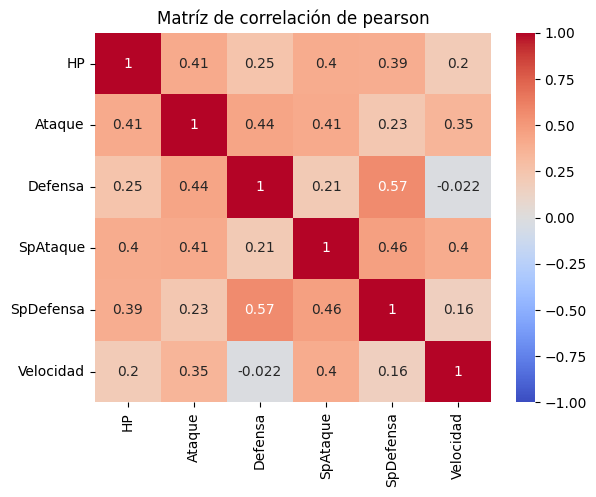

In [177]:
matriz_pokemon = x_train_pokemon[['HP','Ataque','Defensa','SpAtaque','SpDefensa' ,'Velocidad']].corr()
sns.heatmap(matriz_pokemon, annot=True, cmap='coolwarm', vmax=1, vmin=-1)
plt.title('Matríz de correlación de pearson')
plt.show()

Defensa y SPDefensa tienen una relación lineal media. Las demás variables presentan relaciones lineales bajas, por lo que podría ser necesario realizar una matriz de correlación no lineal para poder observar alguna correlación fuerte o tomar alguna decisión.

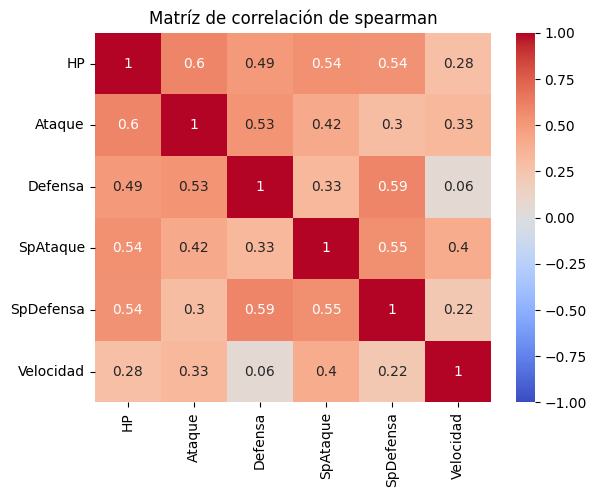

In [178]:
matriz_pokemon_no_lineal = x_train_pokemon[['HP','Ataque','Defensa','SpAtaque','SpDefensa' ,'Velocidad']].corr(method='spearman')
sns.heatmap(matriz_pokemon_no_lineal, annot=True, cmap='coolwarm', vmax=1, vmin=-1)
plt.title('Matríz de correlación de spearman')
plt.show()

Se observa que hay mayor relación no lineal entre las variables, pero aun así siguen siendo valores medios o bajos, por lo que podemos afirmar que no es necesario descartar ninguna variable del dataset.

In [179]:
minmax_scaler = MinMaxScaler().set_output(transform='pandas')
x_train_pokemon_esc = minmax_scaler.fit_transform(x_train_pokemon)
x_train_pokemon2_esc = minmax_scaler.fit_transform(x_train_pokemon2)
x_test_pokemon_esc = minmax_scaler.fit_transform(x_test_pokemon)
x_test_pokemon2_esc = minmax_scaler.fit_transform(x_test_pokemon2)

In [180]:
x_train_pokemon_esc.describe()

Ataque  Defensa  Velocidad      HP  SpAtaque  SpDefensa
count 383.000  383.000    383.000 383.000   383.000    383.000
mean    0.370    0.274      0.393   0.260     0.338      0.244
std     0.180    0.135      0.189   0.101     0.170      0.136
min     0.000    0.000      0.000   0.000     0.000      0.000
25%     0.234    0.182      0.258   0.193     0.217      0.143
50%     0.345    0.250      0.387   0.252     0.299      0.219
75%     0.468    0.341      0.516   0.303     0.443      0.331
max     1.000    1.000      1.000   1.000     1.000      1.000

-----------
----------
-------------

## 4 Realizar la estimación del atributo TipoPokemon utilizando árboles de decisión (Clasificación)

In [181]:
decision_tree_pokemon_clas_raw = tree.DecisionTreeClassifier(max_depth=1, min_samples_leaf=1,min_samples_split=2, random_state=5232)

decision_tree_pokemon_clas_raw.fit(x_train_pokemon_esc, y_train_pokemon)

DecisionTreeClassifier(max_depth=1, random_state=5232)

In [182]:
decision_tree_pokemon2_clas_raw = tree.DecisionTreeClassifier(max_depth=1, min_samples_leaf=1,min_samples_split=2, random_state=5232)

decision_tree_pokemon2_clas_raw.fit(x_train_pokemon2_esc, y_train_pokemon2)

DecisionTreeClassifier(max_depth=1, random_state=5232)

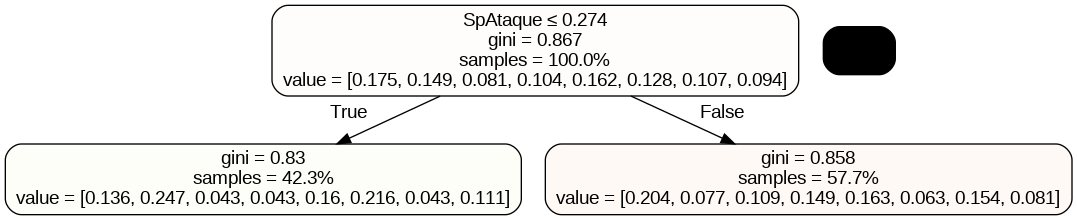

In [183]:
features_pokemon = list(x_train_pokemon.columns)


# Exportar el árbol a un archivo .dot
dot_data = export_graphviz(
    decision_tree_pokemon_clas_raw,
    out_file=None,
    feature_names=features_pokemon,
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=True
)

# Usar pydotplus para crear el gráfico
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())  # Muestra el gráfico en formato PNG

Solamente podemos apreciar que de las 8 clases, predice unicamente 2, y de manera poco precisa. Siendo las clases 1 y 0

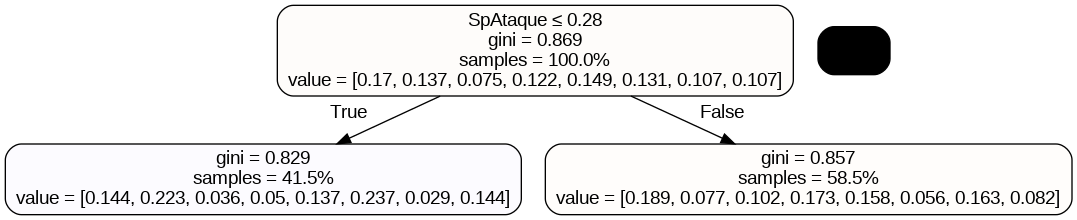

In [184]:
features_pokemon = list(x_train_pokemon.columns)


# Exportar el árbol a un archivo .dot
dot_data = export_graphviz(
    decision_tree_pokemon2_clas_raw,
    out_file=None,
    feature_names=features_pokemon,
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=True
)

# Usar pydotplus para crear el gráfico
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())  # Muestra el gráfico en formato PNG

Solamente podemos apreciar que de las 8 clases, predice unicamente 2, y de manera poco precisa. Siendo las clases 5 y 0

In [185]:
metricas(decision_tree_pokemon_clas_raw, decision_tree_pokemon2_clas_raw, x_test_pokemon_esc, x_test_pokemon2_esc)

Accuracy  Precision  Recall
Test 1     0.177      0.058   0.177
Test 2     0.194      0.052   0.194

Primero, se plantea un modelo muy sencillo del árbol de clasificación, para poder así observar cuales son las clases que se van a predecir con mayor probabilidad.

-----------
----------
--------------

### Arboles sin poda

In [186]:
decision_tree_pokemon_clas = DecisionTreeClassifier(random_state=5232)

param_grid = {'max_depth': [3,4,5,6],
              'min_samples_leaf': [1,2,3,4],
              'min_samples_split': [2,3,4,5],
              'criterion': ['gini', 'entropy']
              }

grid_search = GridSearchCV(estimator=decision_tree_pokemon_clas, param_grid=param_grid, scoring=['accuracy','precision','recall'], n_jobs=-1,refit='accuracy')

grid_search.fit(x_train_pokemon_esc, y_train_pokemon)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [187]:
decision_tree_pokemon_clas = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1,min_samples_split=2,criterion='entropy', random_state=5232)

decision_tree_pokemon_clas.fit(x_train_pokemon_esc, y_train_pokemon)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=5232)

In [188]:
decision_tree_pokemon2_clas = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1,min_samples_split=2 ,criterion='entropy', random_state=5232)

decision_tree_pokemon2_clas.fit(x_train_pokemon2_esc, y_train_pokemon2)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=5232)

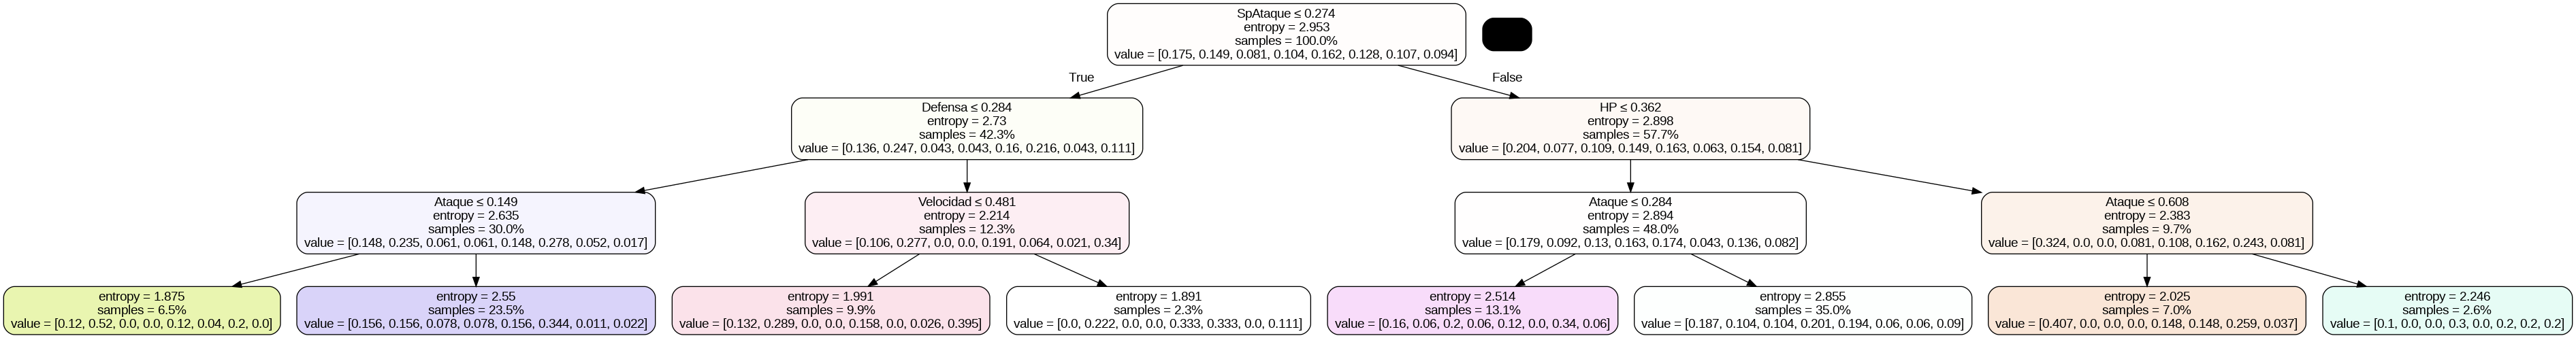

In [189]:
features_pokemon = list(x_train_pokemon.columns)


# Exportar el árbol a un archivo .dot
dot_data = export_graphviz(
    decision_tree_pokemon_clas,
    out_file=None,
    feature_names=features_pokemon,
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=True
)

# Usar pydotplus para crear el gráfico
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())  # Muestra el gráfico en formato PNG

Podemos observar que 7 de las 8 clases pueden ser predecidas por las probabilidades de las hojas del arbol de decisión del primer conjunto de entrenamiento. Siendo las clases 0, 1, 3, 4, 5, 6 y 7. Aunque se vayan a predecir todas las clases enumaderadas, observamos que algunas de ellas van a tener mayor presencia, ya que la hoja donde se ven las probabilidades tiene una mayor cantidad de datos del dataset.

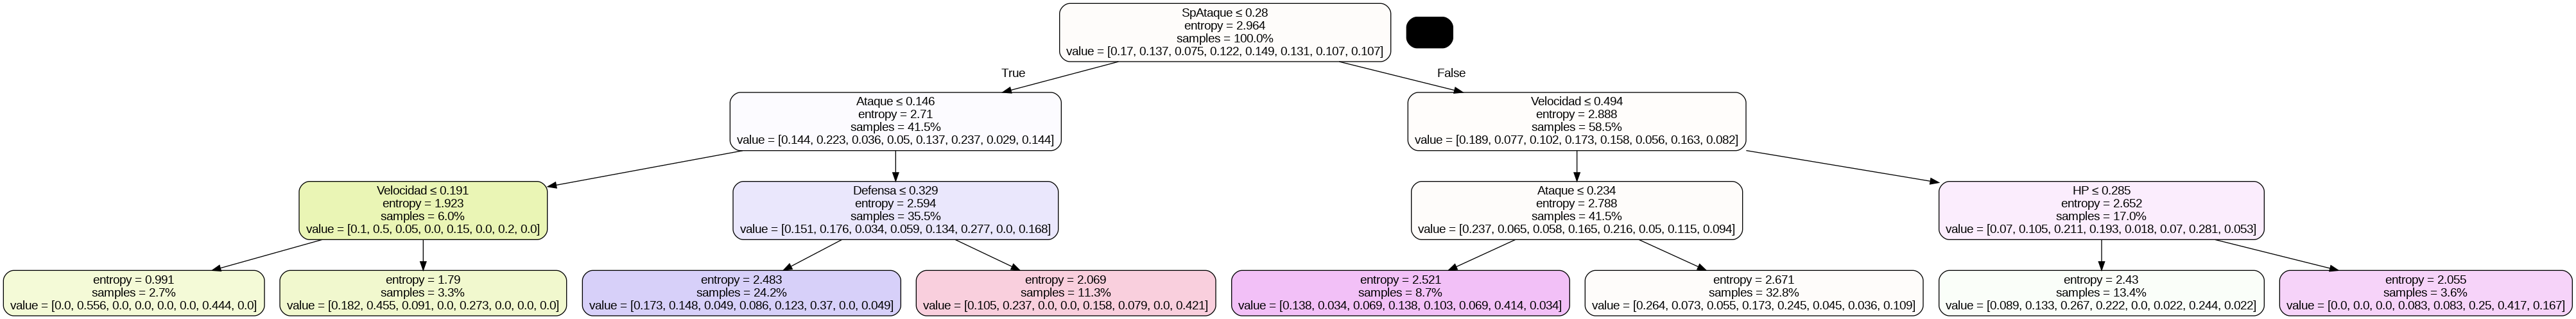

In [190]:
features_pokemon2 = list(x_train_pokemon2.columns)

# Exportar el árbol a un archivo .dot
dot_data = export_graphviz(
    decision_tree_pokemon2_clas,
    out_file=None,
    feature_names=features_pokemon2,
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=True
)

# Usar pydotplus para crear el gráfico
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())  # Muestra el gráfico en formato PNG

Podemos observar que 6 de las 8 clases pueden ser predecidas por las probabilidades de las hojas del arbol de decisión del segundo conjunto de entrenamiento. Siendo la 0, 1, 2, 5, 6 y 7. Aunque se vayan a predecir todas las clases enumaderadas, observamos que algunas de ellas van a tener mayor presencia, ya que la hoja donde se ven las probabilidades tiene una mayor cantidad de datos del dataset.

In [191]:
metricas(decision_tree_pokemon_clas,decision_tree_pokemon2_clas,x_test_pokemon_esc,x_test_pokemon2_esc)

Accuracy  Precision  Recall
Test 1     0.146      0.126   0.146
Test 2     0.215      0.185   0.215

Se observa que aunque el segundo conjunto de testeo tenga mejores métricas siguen siendo pobres.

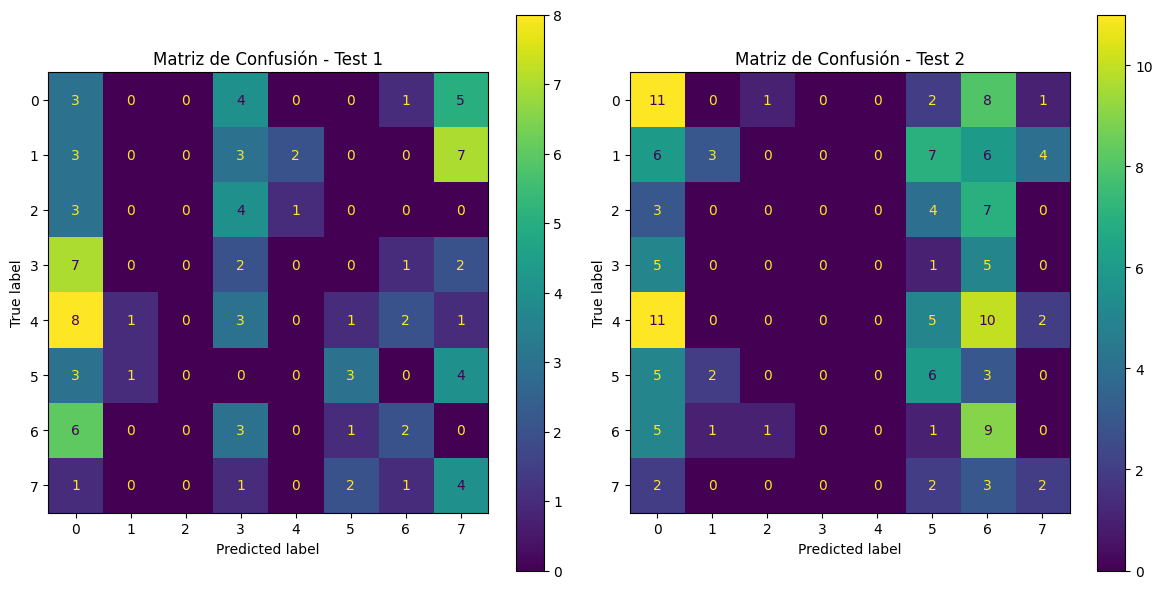

In [192]:
matrices(decision_tree_pokemon_clas,decision_tree_pokemon2_clas,x_test_pokemon_esc,x_test_pokemon2_esc, y_test_pokemon, y_test_pokemon2)

Como se observó en los árboles de decisión, solo 7 clases podrían ser predichas en el primer conjunto de entrenamiento y 6 clases en el segundo conjunto de entrenamiento. También se observa que algunas clases son predichas en mayor cantidad que otras, como se analizó anteriormente.

----------------
-----------------
------------------

### Arboles con poda

In [193]:
decision_tree_pokemon_clas = DecisionTreeClassifier(random_state=5232)

param_grid = {'max_depth': [3,4,5,6],
              'min_samples_leaf': [1,2,3],
              'min_samples_split': [2,3,4],
              'criterion': ['gini', 'entropy'],
              'ccp_alpha': [0.01, 0.05, 0.1]
              }

grid_search = GridSearchCV(estimator=decision_tree_pokemon_clas, param_grid=param_grid, scoring=['accuracy','precision','recall'], n_jobs=-1,refit='accuracy')

grid_search.fit(x_train_pokemon_esc, y_train_pokemon)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'ccp_alpha': 0.05, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [194]:
decision_tree_pokemon_clas_poda = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=1,min_samples_split=2,criterion='entropy', random_state=5232, ccp_alpha=0.05)

decision_tree_pokemon_clas_poda.fit(x_train_pokemon_esc, y_train_pokemon)

DecisionTreeClassifier(ccp_alpha=0.05, criterion='entropy', max_depth=4,
                       random_state=5232)

In [195]:
decision_tree_pokemon2_clas_poda = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=1,min_samples_split=2,criterion='entropy', random_state=5232, ccp_alpha=0.05)

decision_tree_pokemon2_clas_poda.fit(x_train_pokemon2_esc, y_train_pokemon2)

DecisionTreeClassifier(ccp_alpha=0.05, criterion='entropy', max_depth=4,
                       random_state=5232)

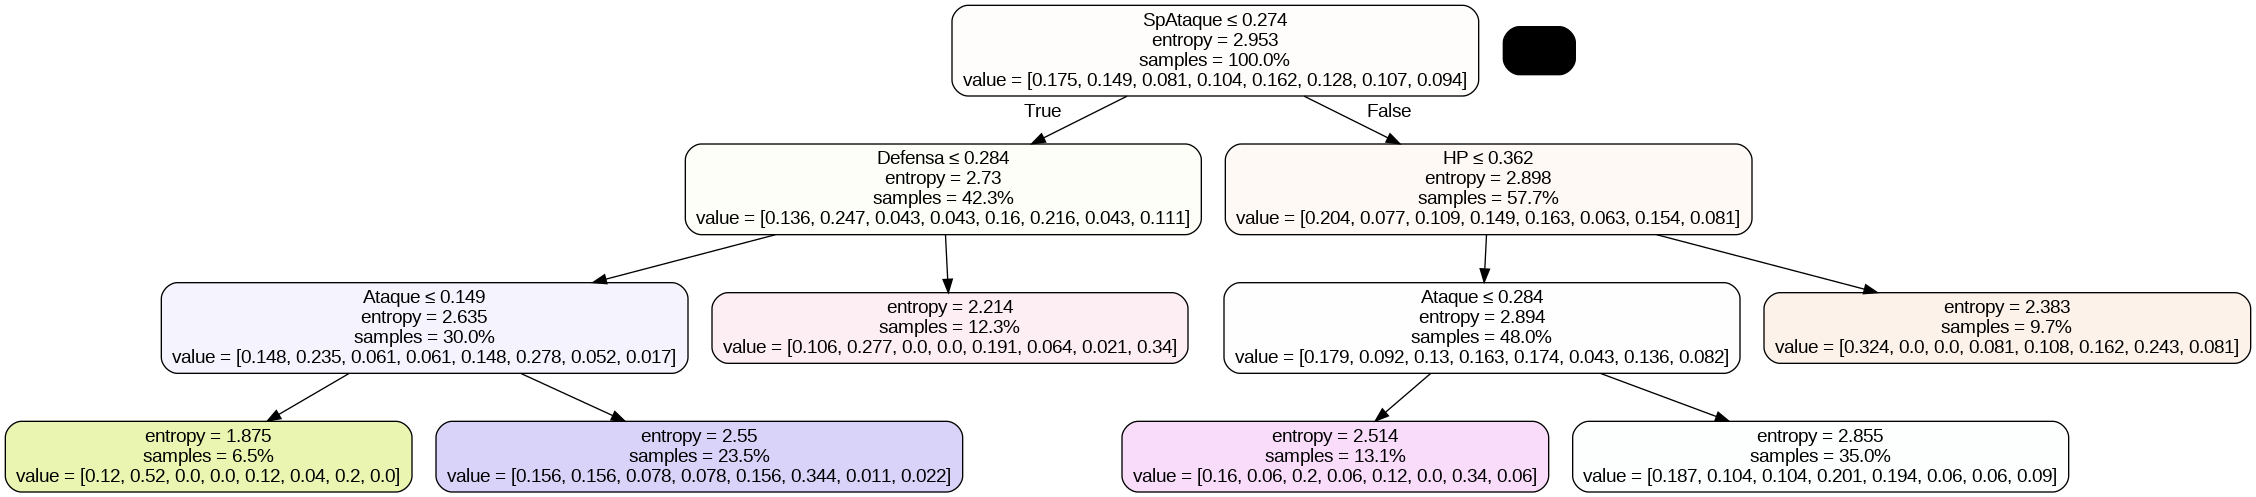

In [196]:
features_pokemon = list(x_train_pokemon.columns)


# Exportar el árbol a un archivo .dot
dot_data = export_graphviz(
    decision_tree_pokemon_clas_poda,
    out_file=None,
    feature_names=features_pokemon,
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=True
)

# Usar pydotplus para crear el gráfico
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())  # Muestra el gráfico en formato PNG

Únicamente podemos observar que de las 8 clases, predice únicamente 6 en el primer conjunto de test, con poda aplicada. Siendo estas clases los números 0, 1, 3, 5, 6, 7. Aunque se vayan a predecir todas las clases enumeradas, observamos que algunas de ellas van a tener mayor presencia, ya que la hoja donde se ven las probabilidades tiene una mayor cantidad de datos del dataset.

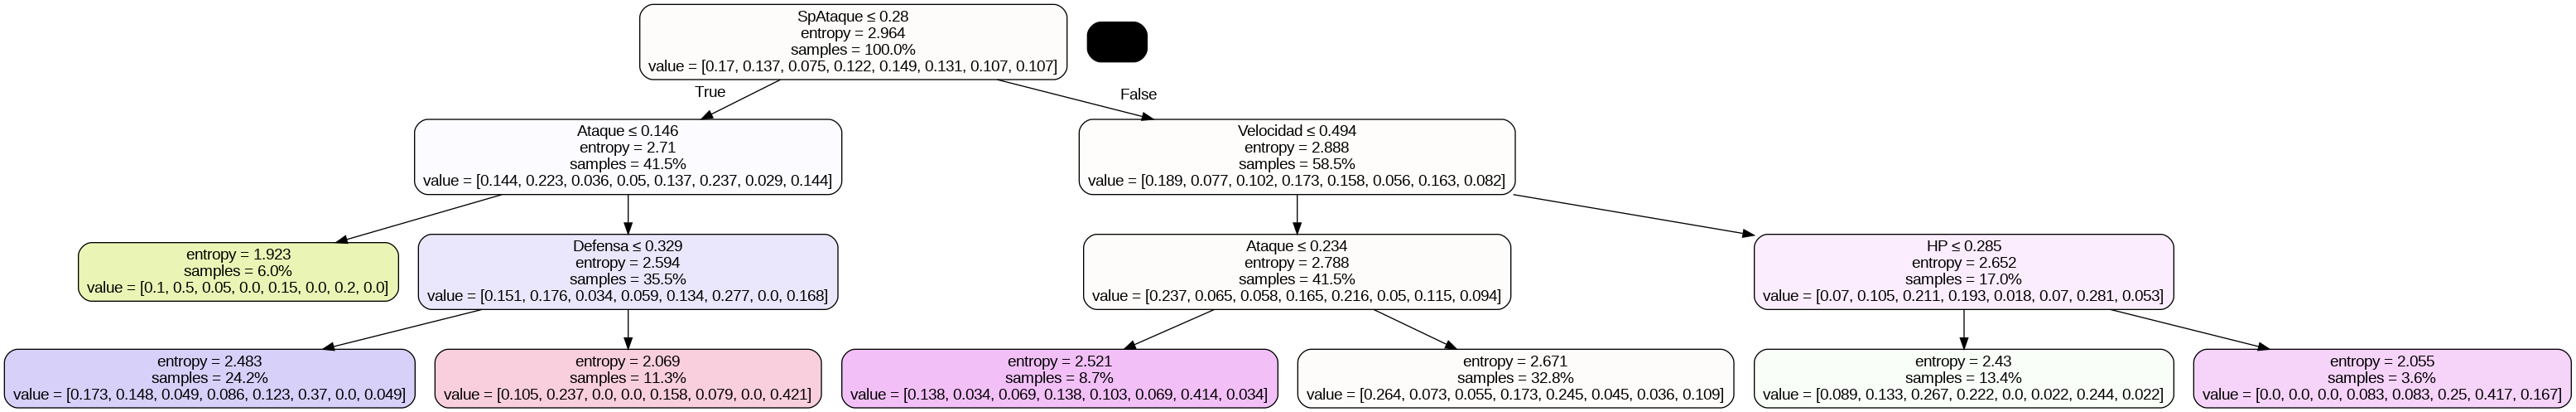

In [197]:
features_pokemon = list(x_train_pokemon.columns)


# Exportar el árbol a un archivo .dot
dot_data = export_graphviz(
    decision_tree_pokemon2_clas_poda,
    out_file=None,
    feature_names=features_pokemon,
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=True
)

# Usar pydotplus para crear el gráfico
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())  # Muestra el gráfico en formato PNG

Únicamente podemos observar que de las 8 clases, predice únicamente 6 en el segundo conjunto de test, con poda aplicada. Siendo estas clases los números 0, 1, 2, 5, 6, 7. Aunque se vayan a predecir todas las clases enumeradas, observamos que algunas de ellas van a tener mayor presencia, ya que la hoja donde se ven las probabilidades tiene una mayor cantidad de datos del dataset.

In [198]:
metricas(decision_tree_pokemon_clas_poda,decision_tree_pokemon2_clas_poda,x_test_pokemon_esc,x_test_pokemon2_esc)

Accuracy  Precision  Recall
Test 1     0.156      0.125   0.156
Test 2     0.215      0.185   0.215

Se puede determinar que en este caso, el segundo conjunto de testeo, que es el que tiene una mayor cantidad de datos, logra métricas un poco mejores, aunque todavía no se logran apreciar ni buenos resultados, ni una gran diferencia entre ambos modelos

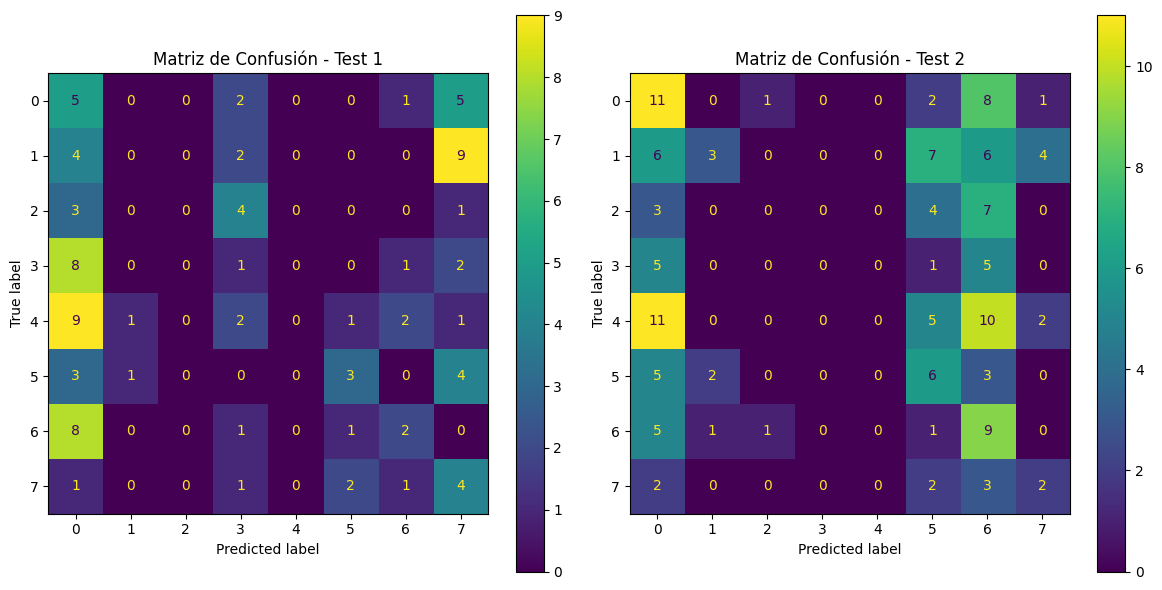

In [199]:
matrices(decision_tree_pokemon_clas_poda,decision_tree_pokemon2_clas_poda,x_test_pokemon_esc,x_test_pokemon2_esc, y_test_pokemon, y_test_pokemon2)

Se observa que para ambas matrices de confusión de los arboles con poda y sin poda hay pocas diferencias. Teniendo el mismo análisis que los arboles sin poda.

-------
-------
-------

## 5. Realizar la estimación del atributo TipoPokemon utilizando Bayes Ingenuo.

In [200]:
bins = [0, 0.25, 0.50, 0.75, 1]
x_train_pokemon_disc = x_train_pokemon_esc.apply(lambda x: pd.cut(x, bins=bins, labels=False, include_lowest=True))
x_train_pokemon2_disc = x_train_pokemon2_esc.apply(lambda x: pd.cut(x, bins=bins, labels=False, include_lowest=True))

In [201]:
modelo_naivebayes = MultinomialNB()
modelo_naivebayes.fit(x_train_pokemon_disc, y_train_pokemon)

modelo_naivebayes2 = MultinomialNB()
modelo_naivebayes2.fit(x_train_pokemon2_disc, y_train_pokemon2)

MultinomialNB()

In [202]:
metricas(modelo_naivebayes, modelo_naivebayes2, x_test_pokemon_esc, x_test_pokemon2_esc)

Accuracy  Precision  Recall
Test 1     0.135      0.018   0.135
Test 2     0.167      0.054   0.167

Se observan métricas pobres como la mayoría de los modelos, nuestra hipóstesis es que bayes ingenuo al funcionar con probabilidades condicionales, va a predecir mayormente las clases con mayor cantidad de datos y que tengan una distribución amplia sobre las variables.

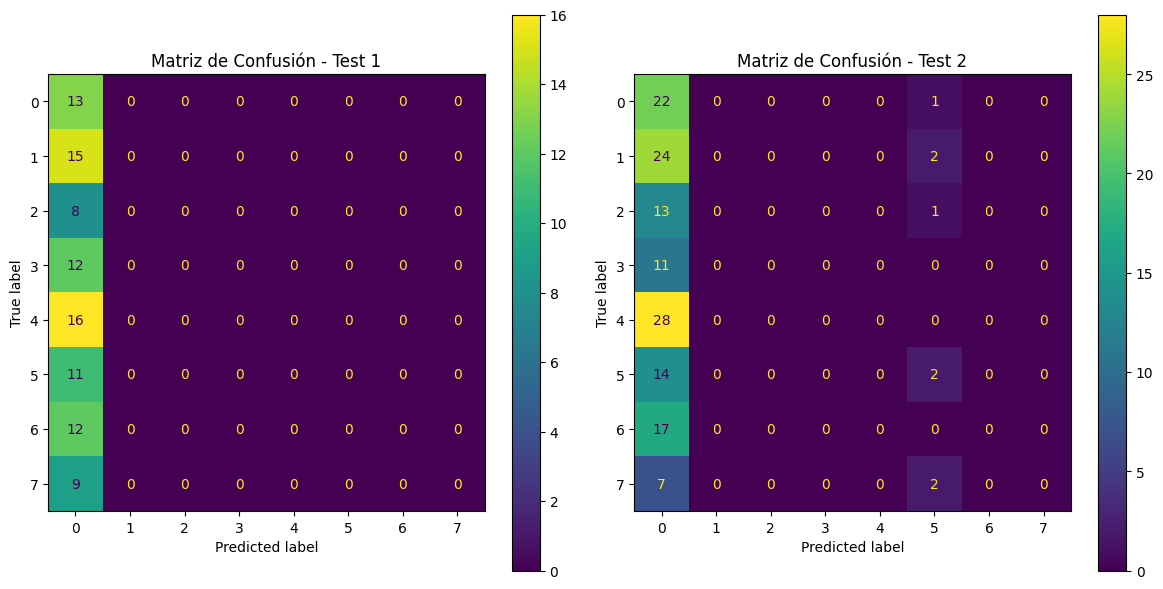

In [203]:
matrices(modelo_naivebayes, modelo_naivebayes2, x_test_pokemon_esc, x_test_pokemon2_esc, y_test_pokemon, y_test_pokemon2)

Observamos que la clase 0 es predicha mayormente, contrastando con las distribuciones de las variables en cada clase por cada variable, se puede llegar a la conclusión de que la clase 0 tiene una gran cantidad de datos y distribución amplia, por lo que puede ser mayormente predecía y al ver la clase 5 predichas, podemos decir que la amplitud de las distribuciones puede ser más importante que la cantidad de datos.

-----------
------------
------------

# 6 - Realizar la estimación del atributo TipoPokemon utilizando k-NN

In [204]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [14,15,16,17,18], 'p': [3,4,5,6,7], 'weights': ['uniform', 'distance'] }

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring=['accuracy','precision','recall'], n_jobs=-1,refit='accuracy')

grid_search.fit(x_train_pokemon_esc, y_train_pokemon)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'n_neighbors': 16, 'p': 6, 'weights': 'distance'}


In [205]:
knn_model = KNeighborsClassifier(n_neighbors=16,p=6,weights='distance')
knn_model2 = KNeighborsClassifier(n_neighbors=16,p=6,weights='distance')

knn_model.fit(x_train_pokemon_esc, y_train_pokemon)
knn_model2.fit(x_train_pokemon2_esc, y_train_pokemon2)

KNeighborsClassifier(n_neighbors=16, p=6, weights='distance')

In [206]:
metricas(knn_model, knn_model2, x_test_pokemon_esc, x_test_pokemon2_esc)

Accuracy  Precision  Recall
Test 1     0.250      0.230   0.250
Test 2     0.250      0.317   0.250

Observamos métricas ligeramente mejores que en los modelos anteriores.

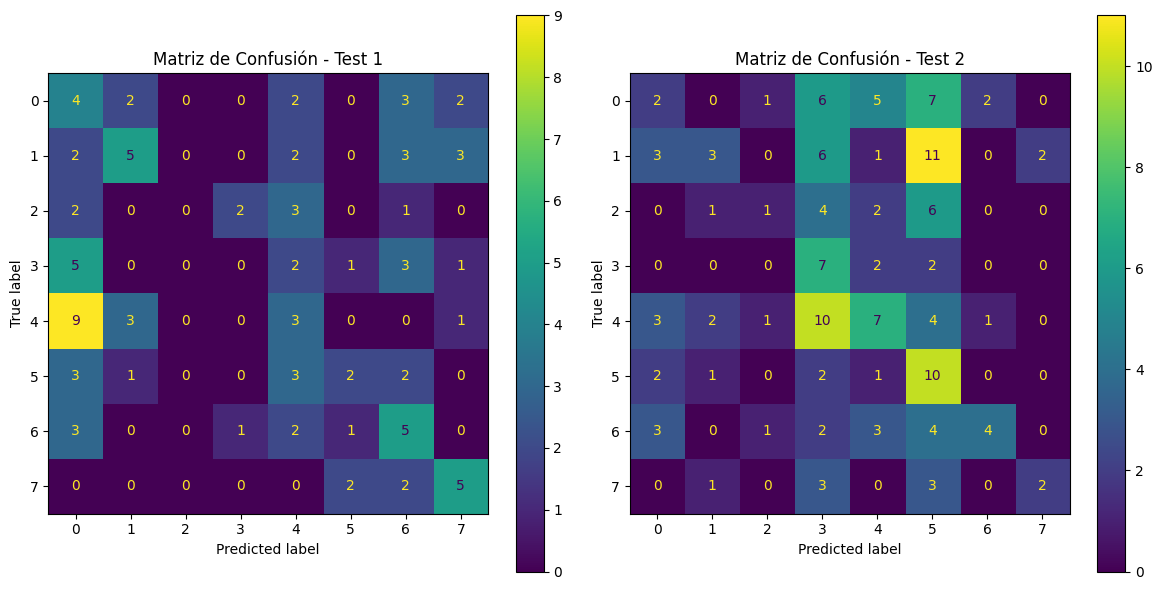

In [207]:
matrices(knn_model, knn_model2, x_test_pokemon_esc, x_test_pokemon2_esc, y_test_pokemon, y_test_pokemon2)

Se observa que, a diferencia de los modelos anteriores, k-NN, al funcionar con distancias entre los datos, puede predecir en por lo menos uno de los conjuntos de testeo todas las clases. Nuestras hipótesis son que mediante distancias y un p elevado los clústeres son más diferenciables que con árboles y bayes ingenuo, aunque si el dataset no está balanceado, siguen siendo métricas pobres.

## Conclusiones



En el primer problema, se obtuvieron buenos resultados. Lo que entendimos de los árboles de regresión es que van a funcionar, sea lineal o no lineal, nuestro problema de regresión. En caso de ser no lineal, tendríamos unas métricas superiores a la regresión lineal, y en el caso contrario unas métricas parecidas. Esto es porque notamos que el árbol parecía estar prediciendo los valores de manera lineal según las hojas. También observamos que el árbol de regresión es menos susceptible al ruido, a diferencia de la regresión lineal.

Luego en el árbol de clasificación pensamos que íbamos a poder obtener de forma más clara los diferentes tipos de pokemones, donde aunque utilizáramos el árbol con los parámetros ideales no fue el caso, lo que si luego terminamos de visualizar en la matriz de confusión como ciertas clases que tienen una distribución más amplia de valores, se ven más representadas en las probabilidades de predicción, además obviamente que la cantidad de valores por clases ayuda a hacer más evidentes estas diferencias. En el caso de realizar las podas, no pudimos visualizar grandes cambios en las métricas, ni en la cantidad de hojas que quitamos utilizando el método de poda. Al momento de utilizar Bayes ingenuo, ya teníamos la hipótesis de que si el árbol de decisión no había podido diferenciar las clases, bayes tampoco. A la hora de implementar k-NN pensamos que tendría mejores métricas, lo cual no terminó sucediendo. Aunque este tuviera métricas ligeramente mejores, el desbalanceo y la poca cantidad de datos parecían influenciar sobre todos los modelos. Concluyendo que en clasificación es totalmente necesario balancear el dataset, siendo lo más real en términos de qué se puede solucionar y qué no.